In [1]:
## Importing the necessary libraries

import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import tensorflow_datasets as tfds
import re
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import zeros
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import  LSTM, BatchNormalization, Bidirectional
from tensorflow.keras.regularizers import l2
from keras import layers, models

import tensorflow_datasets as tfds






c:\users\sharm\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
## Load the dataset 

ds = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)


<PrefetchDataset element_spec={'data': {'customer_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'helpful_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'marketplace': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_category': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_parent': TensorSpec(shape=(), dtype=tf.string, name=None), 'product_title': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_body': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_date': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_headline': TensorSpec(shape=(), dtype=tf.string, name=None), 'review_id': TensorSpec(shape=(), dtype=tf.string, name=None), 'star_rating': TensorSpec(shape=(), dtype=tf.int32, name=None), 'total_votes': TensorSpec(shape=(), dtype=tf.int32, name=None), 'verified_purchase': TensorSpec(shape=(), dtype=tf.int64, name=None), 'vine': TensorSpec(shape=(), dtype=

In [3]:
## converting dataset into pandas dataframe

df = tfds.as_dataframe(ds)


# EDA

In [4]:
## Checking the dataframe

df.head()


,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'20980074',0,b'US',b'Mobile_Electronics',b'B00D1847NE',b'274617424',b'Teenage Mutant Ninja Turtles Boombox CD Play...,b'Does not work',b'2015-01-09',b'One Star',b'R1OVS0D6SEXPW7',1,0,0,1
1,b'779273',0,b'US',b'Mobile_Electronics',b'B00KMO6DYG',b'397452138',b'4 Gauge Amp Kit Amplifier Install Wiring Com...,b'This is a great wiring kit i used it to set ...,b'2015-08-06',b'Great kit',b'R9VSD0ET8FERB',4,0,0,1
2,b'15410531',0,b'US',b'Mobile_Electronics',b'B000GWLL0K',b'948304826',b'Travel Wall Charger fits Creative Zen Vision...,b'It works great so much faster than USB charg...,b'2007-03-15',b'A/C Charger for Creative Zen Vision M',b'R3ISXCZHWLJLBH',5,0,0,1
3,b'27389005',0,b'US',b'Mobile_Electronics',b'B008L3JE6Y',b'466340015',b'High Grade Robust 360\xc2\xb0 Adjustable Car...,b'This product was purchased to hold a monitor...,b'2013-07-30',b'camera stand',b'R1TWVUDOFJSQAW',5,0,0,1
4,b'2663569',0,b'US',b'Mobile_Electronics',b'B00GHZS4SC',b'350592810',b'HDE Multifunctional Bluetooth FM Audio Car K...,"b""it works but it has really bad sound quality...",b'2014-12-31',b'bad sound quality',b'R2PEOEUR1LP0GH',3,0,0,1


In [5]:
## Analyzing the information

df.info()


<class 'tensorflow_datasets.core.as_dataframe.StyledDataFrame'>
RangeIndex: 104975 entries, 0 to 104974
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   data/customer_id        104975 non-null  object
 1   data/helpful_votes      104975 non-null  int32 
 2   data/marketplace        104975 non-null  object
 3   data/product_category   104975 non-null  object
 4   data/product_id         104975 non-null  object
 5   data/product_parent     104975 non-null  object
 6   data/product_title      104975 non-null  object
 7   data/review_body        104975 non-null  object
 8   data/review_date        104975 non-null  object
 9   data/review_headline    104975 non-null  object
 10  data/review_id          104975 non-null  object
 11  data/star_rating        104975 non-null  int32 
 12  data/total_votes        104975 non-null  int32 
 13  data/verified_purchase  104975 non-null  int64 
 14  data/vine 

In [6]:
# Displaying the number of columns and instances

df.shape


(104975, 15)

In [7]:
## Assigning the positive and negative sentiments as per the score


df["Sentiment"] = df["data/star_rating"].apply(lambda score: "positive" if score >= 3 else "negative")
df['Num_words_text'] = df['data/review_body'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(df['data/star_rating'].value_counts())
print('-------------------------')
max_df_sentence_length  = df['Num_words_text'].max()

print('Train Max Sentence Length :'+str(max_df_sentence_length))
df.head(5)


-------Dataset --------
5    52255
4    18088
1    17587
3     9734
2     7311
Name: data/star_rating, dtype: int64
-------------------------
Train Max Sentence Length :2906


,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine,Sentiment,Num_words_text
0,b'20980074',0,b'US',b'Mobile_Electronics',b'B00D1847NE',b'274617424',b'Teenage Mutant Ninja Turtles Boombox CD Play...,b'Does not work',b'2015-01-09',b'One Star',b'R1OVS0D6SEXPW7',1,0,0,1,negative,3
1,b'779273',0,b'US',b'Mobile_Electronics',b'B00KMO6DYG',b'397452138',b'4 Gauge Amp Kit Amplifier Install Wiring Com...,b'This is a great wiring kit i used it to set ...,b'2015-08-06',b'Great kit',b'R9VSD0ET8FERB',4,0,0,1,positive,65
2,b'15410531',0,b'US',b'Mobile_Electronics',b'B000GWLL0K',b'948304826',b'Travel Wall Charger fits Creative Zen Vision...,b'It works great so much faster than USB charg...,b'2007-03-15',b'A/C Charger for Creative Zen Vision M',b'R3ISXCZHWLJLBH',5,0,0,1,positive,16
3,b'27389005',0,b'US',b'Mobile_Electronics',b'B008L3JE6Y',b'466340015',b'High Grade Robust 360\xc2\xb0 Adjustable Car...,b'This product was purchased to hold a monitor...,b'2013-07-30',b'camera stand',b'R1TWVUDOFJSQAW',5,0,0,1,positive,29
4,b'2663569',0,b'US',b'Mobile_Electronics',b'B00GHZS4SC',b'350592810',b'HDE Multifunctional Bluetooth FM Audio Car K...,"b""it works but it has really bad sound quality...",b'2014-12-31',b'bad sound quality',b'R2PEOEUR1LP0GH',3,0,0,1,positive,16


In [8]:
## Choosing the relevant columns

df = df[["data/product_title", "data/review_body", "data/review_headline", "Sentiment", "Num_words_text"]]


In [9]:
## maping the positive review to 1 and negative to 0

df['Sentiment'] = df['Sentiment'].map({'positive':1, 'negative':0})


c:\users\sharm\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df.head()


,data/product_title,data/review_body,data/review_headline,Sentiment,Num_words_text
0,b'Teenage Mutant Ninja Turtles Boombox CD Play...,b'Does not work',b'One Star',0,3
1,b'4 Gauge Amp Kit Amplifier Install Wiring Com...,b'This is a great wiring kit i used it to set ...,b'Great kit',1,65
2,b'Travel Wall Charger fits Creative Zen Vision...,b'It works great so much faster than USB charg...,b'A/C Charger for Creative Zen Vision M',1,16
3,b'High Grade Robust 360\xc2\xb0 Adjustable Car...,b'This product was purchased to hold a monitor...,b'camera stand',1,29
4,b'HDE Multifunctional Bluetooth FM Audio Car K...,"b""it works but it has really bad sound quality...",b'bad sound quality',1,16


In [11]:
## Adding a column & applyung str.decode to decode to unicode 

df['short_review'] =df['data/review_body'].str.decode("utf-8")


c:\users\sharm\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df.head()


,data/product_title,data/review_body,data/review_headline,Sentiment,Num_words_text,short_review
0,b'Teenage Mutant Ninja Turtles Boombox CD Play...,b'Does not work',b'One Star',0,3,Does not work
1,b'4 Gauge Amp Kit Amplifier Install Wiring Com...,b'This is a great wiring kit i used it to set ...,b'Great kit',1,65,This is a great wiring kit i used it to set up...
2,b'Travel Wall Charger fits Creative Zen Vision...,b'It works great so much faster than USB charg...,b'A/C Charger for Creative Zen Vision M',1,16,It works great so much faster than USB charger...
3,b'High Grade Robust 360\xc2\xb0 Adjustable Car...,b'This product was purchased to hold a monitor...,b'camera stand',1,29,This product was purchased to hold a monitor o...
4,b'HDE Multifunctional Bluetooth FM Audio Car K...,"b""it works but it has really bad sound quality...",b'bad sound quality',1,16,it works but it has really bad sound quality. ...


In [13]:
## Create the Corpus

corpus = []
for i in range(0, 104975):
  review = re.sub('[^a-zA-Z]', ' ', df['short_review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)


In [14]:
print(corpus[:4])


['not work', 'great wire kit use set pyle watt amp alpin sub work fine im not sure power cord length batteri back ground cord bit short that flaw gave star great kit', 'work great much faster usb charger buy glad', 'product purchas hold monitor desk connect secur camera door busi serv purpos perfectli']


In [15]:
## Assigning the values to parameters

vocab_size = 20000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = ""
training_size = 70000
test_size = 95000


In [16]:
# Createl list of sentiment labels

labels = df['Sentiment'].tolist()


In [17]:
# Assigning training, test and validation sets

training_sentences = corpus[0:training_size]
val_sentence       = corpus[training_size: test_size]
testing_sentences  = corpus[test_size:]
training_labels    = labels[0:training_size]
val_labels         = labels[training_size:test_size]
testing_labels     = labels[test_size:]


In [18]:
## Maping text data to numbers and adding padding function makes the length equal

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_sentence)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [19]:
## Saving the tokenizer in a file

import io
import json
tokenizer_json = tokenizer.to_json()
with io.open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))


In [20]:
## Creating arrays of training, test and validation sets

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
val_padded      = np.array(val_padded)
val_labels      = np.array(val_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)


# ANN Model Implementation 

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(1, activation='sigmoid'),
])



In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           320000    
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               204928    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
num_epochs = 8
history = model.fit(training_padded, training_labels, epochs=num_epochs,batch_size=32,validation_data=(val_padded, val_labels), verbose=1)


Epoch 1/8
2188/2188 [==============================] - 24s 10ms/step - loss: 0.3214 - accuracy: 0.8640 - val_loss: 0.2642 - val_accuracy: 0.8924
Epoch 2/8
2188/2188 [==============================] - 19s 9ms/step - loss: 0.2461 - accuracy: 0.8988 - val_loss: 0.2632 - val_accuracy: 0.8904
Epoch 3/8
2188/2188 [==============================] - 19s 9ms/step - loss: 0.2188 - accuracy: 0.9109 - val_loss: 0.2708 - val_accuracy: 0.8910
Epoch 4/8
2188/2188 [==============================] - 19s 9ms/step - loss: 0.1981 - accuracy: 0.9198 - val_loss: 0.2869 - val_accuracy: 0.8872
Epoch 5/8
2188/2188 [==============================] - 19s 9ms/step - loss: 0.1782 - accuracy: 0.9280 - val_loss: 0.3030 - val_accuracy: 0.8865
Epoch 6/8
2188/2188 [==============================] - 19s 9ms/step - loss: 0.1637 - accuracy: 0.9350 - val_loss: 0.3282 - val_accuracy: 0.8873
Epoch 7/8
2188/2188 [==============================] - 19s 9ms/step - loss: 0.1520 - accuracy: 0.9399 - val_loss: 0.3203 - val_accuracy

In [25]:
test_loss, test_acc = model.evaluate(testing_padded, testing_labels, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Test Loss: 0.3263629674911499
Test Accuracy: 0.8847118020057678


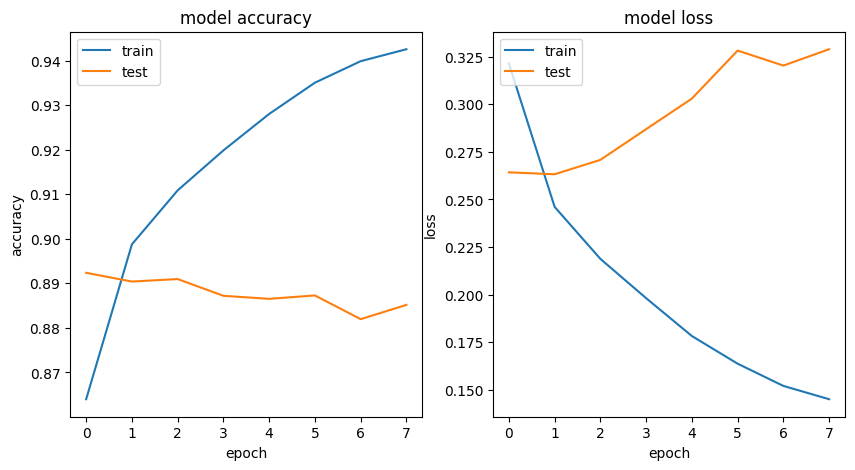

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train','test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train','test'], loc='upper left')

plt.show()

# From the graph we can see that there is significant difference between the test and train accuracy. For training we are getting over 95% accuracy while for test we got 88.4% accuracy. There is also difference between the losses. Inference: The model is still overfitting

# Initially when I started training the model, we got 100% test accuracy. Which was a clear sign of overfitting, I tried tweaking the hyperparameters and adding early stopping, in addition to already implemented training, test and validation datasets and reducing the data size. However the model was not performing well, then I tried adding multiple dense layers and dropout layers, which gave a better result which can be seen in the above code. For brevity I am submitting the better performing code. I do have the previous notebooks with old code and plan to work on it and make improvements.

## CNN


In [27]:
from keras.layers import Conv1D

model = tf.keras.Sequential([

    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    tf.keras.layers.Flatten(),

])
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           320000    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           10368     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 330,497
Trainable params: 330,497
Non-trainable params: 0
________________________________________________

In [28]:
num_epochs = 8
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(val_padded, val_labels), verbose=1)

Epoch 1/8
2188/2188 [==============================] - 25s 11ms/step - loss: 0.2950 - accuracy: 0.8723 - val_loss: 0.2595 - val_accuracy: 0.8924
Epoch 2/8
2188/2188 [==============================] - 25s 11ms/step - loss: 0.2224 - accuracy: 0.9077 - val_loss: 0.2546 - val_accuracy: 0.8935
Epoch 3/8
2188/2188 [==============================] - 25s 11ms/step - loss: 0.1844 - accuracy: 0.9262 - val_loss: 0.2742 - val_accuracy: 0.8869
Epoch 4/8
2188/2188 [==============================] - 25s 11ms/step - loss: 0.1478 - accuracy: 0.9436 - val_loss: 0.2932 - val_accuracy: 0.8870
Epoch 5/8
2188/2188 [==============================] - 26s 12ms/step - loss: 0.1137 - accuracy: 0.9590 - val_loss: 0.3342 - val_accuracy: 0.8800
Epoch 6/8
2188/2188 [==============================] - 25s 11ms/step - loss: 0.0847 - accuracy: 0.9709 - val_loss: 0.3808 - val_accuracy: 0.8785
Epoch 7/8
2188/2188 [==============================] - 25s 11ms/step - loss: 0.0641 - accuracy: 0.9792 - val_loss: 0.4270 - val_ac

In [29]:
test_loss, test_acc = model.evaluate(testing_padded, testing_labels, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Test Loss: 0.47536909580230713
Test Accuracy: 0.8734837174415588


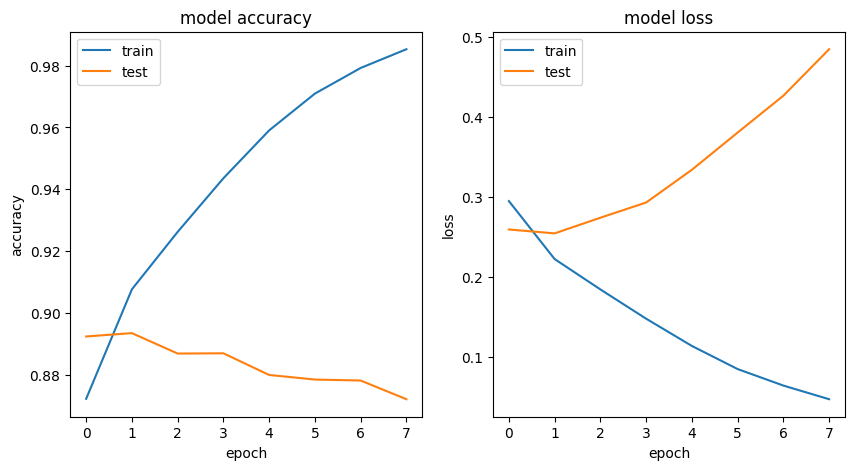

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train','test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train','test'], loc='upper left')

plt.show()

#  From the above graph for CNN with 1D Convolution Network (Primarily CNN is used for image data, but it has also proved to work well for text data, for text data we use 1D network) we can see that there is significant difference between the test and train accuracy. For training we are getting over 99% accuracy while for test we got 87% accuracy. There is also difference between the losses. Inference: The model is still overfitting

# Initially when I started training the model, we got 100% test accuracy. Which was a clear sign of overfitting, I tried tweaking the hyperparameters and adding early stopping, in addition to already implemented training, test and validation datasets and reducing the data size. However the model was not performing well, then I tried adding multiple dense layers and dropout layers, which gave a better result which can be seen in the above code. For brevity I am submitting the better performing code. I do have the previous notebooks with old code and plan to work on it and make improvements.

# RNN

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           320000    
                                                                 
 lstm (LSTM)                 (None, 100, 128)          74240     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 525,953
Trainable params: 525,953
Non-trainable params: 0
_________________________________________________________________


In [32]:
num_epochs = 8
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(val_padded, val_labels), verbose=1)

Epoch 1/8
2188/2188 [==============================] - 374s 169ms/step - loss: 0.5504 - accuracy: 0.7627 - val_loss: 0.5386 - val_accuracy: 0.7682
Epoch 2/8
2188/2188 [==============================] - 374s 171ms/step - loss: 0.5010 - accuracy: 0.7778 - val_loss: 0.5077 - val_accuracy: 0.7780
Epoch 3/8
2188/2188 [==============================] - 374s 171ms/step - loss: 0.5121 - accuracy: 0.7798 - val_loss: 0.5485 - val_accuracy: 0.7626
Epoch 4/8
2188/2188 [==============================] - 370s 169ms/step - loss: 0.5481 - accuracy: 0.7627 - val_loss: 0.5483 - val_accuracy: 0.7626
Epoch 5/8
2188/2188 [==============================] - 378s 173ms/step - loss: 0.5481 - accuracy: 0.7627 - val_loss: 0.5483 - val_accuracy: 0.7626
Epoch 6/8
2188/2188 [==============================] - 373s 170ms/step - loss: 0.5481 - accuracy: 0.7627 - val_loss: 0.5482 - val_accuracy: 0.7626
Epoch 7/8
2188/2188 [==============================] - 703s 321ms/step - loss: 0.5481 - accuracy: 0.7627 - val_loss: 0

In [33]:
test_loss, test_acc = model.evaluate(testing_padded, testing_labels, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Test Loss: 0.5470375418663025
Test Accuracy: 0.7642105221748352


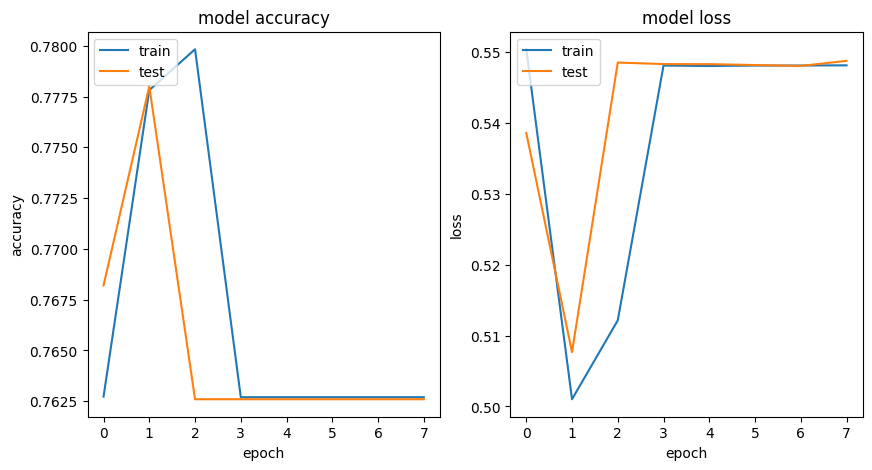

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train','test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train','test'], loc='upper left')

plt.show()

# From the graph we can see that there is significant difference between the test and train accuracy. For training we are getting over 76% accuracy and for test we also got 76% accuracy. The train and test accuracies are almost the same which means RNN with LSTM is performing better as compared to ANN & CNN. Even though the accuracy is not at par, some more tuning can help improve the model

# Initially when I started training the model, we got 100% test accuracy. Which was a clear sign of overfitting, I tried tweaking the hyperparameters and adding early stopping, in addition to already implemented training, test and validation datasets and reducing the data size. However the model was not performing well, then I tried adding multiple dense layers and dropout layers, which gave a better result which can be seen in the above code. For brevity I am submitting the better performing code. I do have the previous notebooks with old code and plan to work on it and make improvements.

In [35]:
#BERT

In [36]:
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification


In [37]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')


In [38]:
tokenizer([training_sentences[0]], truncation=True,

                            padding=True, max_length=128)


{'input_ids': [[101, 2025, 2147, 102]], 'attention_mask': [[1, 1, 1, 1]]}

In [39]:
train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)

val_encodings = tokenizer(val_sentences,
                            truncation=True,
                            padding=True)


MemoryError: 

# We are getting memory error as I don't have GPU on my system. However it is shown in the reference article run on a GPU machine.

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    training_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    val_labels
))
     


In [ ]:
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=2)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5, epsilon=1e-08)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
model.fit(train_dataset.shuffle(100).batch(16),
          epochs=2,
          batch_size=16,
          validation_data=val_dataset.shuffle(100).batch(16))



In [ ]:
test_loss, test_acc = model.evaluate(testing_padded, testing_labels, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# The BERT model which was already tuned and used as a base for our Project,to implement and compare ANN, CNN & RNN with BERT. From the reference article on BERT and the 92% accuracy, hands down BERT is a better performing model for Sentiment Analysis of a given dataset.

# There are articles stating that BERT has replaced RNN with LSTM model as in RNN models there was huge imformation loss when dealing with sequencial data. From our models also we can see that RNN performed better and BERT is even better than RNN.

# There is still a good scope to learn and tweak the models to get a resonably good accuracy and model tuning. Due to lack of time and still being in the DL learning process, I am going to continue working on this project and get a good working model. Once done I would like to share my inferences and results with professors for their feedback.

## Also the model fit for RNN with LSTM took around 45 minutes each time. Tweaking the epochs and instance size migh influence with the time and performance of the model